<a href="https://colab.research.google.com/github/LuizAz3vedo/Dash-LTD-Python/blob/main/Dados-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando dependencias:
%pip install pandas 
%pip install pandas_profiling
%pip install numpy 
%pip install matplotlib
%pip install seaborn
%pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.9 MB/s eta 0:00:00


In [2]:
# Importando algumas bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Criando um Dataset

# Definindo os valores das colunas
Meios = ["TV", "Radio", "Jornal", "Internet"] * 250 # Repete cada valor 250 vezes
Pessoas = np.random.randint(1000, 15001, size=1000) # Valores aleatorioos entre 1000 e 15000
Investimento = np.random.randint(10000, 100001, size=1000)
Retorno = np.random.randint(20000, 150001, size=1000)
Periodo = np.repeat(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro'], 100) # Meses

# Criando um dicionário com as colunas e seus respectivos valores
dados = {'Meios': Meios, 'Periodo': Periodo, 'Pessoas': Pessoas, 'Investimento': Investimento, 'Retorno': Retorno}

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)

# Adicionando 10 linhas em branco ao final do DataFrame
linhas_em_branco = pd.DataFrame(index=range(10), columns=df.columns)
df = pd.concat([df, linhas_em_branco], axis=0)

# Adicionando 5 linhas com valores nulos aleatórios
df.iloc[5:10, 1:3] = np.nan

# Calculando a nova coluna ROI
ganho = df['Retorno']
custo = df['Investimento']
ROI = ((ganho - custo) / custo) * 100
df['ROI %'] = ROI

df['ROI %'] = df['ROI %'].apply('{:.2f}%'.format) # Formantando para 2 casas decimais


# Exibindo as primeiras 5 linhas do DataFrame
print(df.head(15))

       Meios  Periodo Pessoas Investimento Retorno    ROI %
0         TV  janeiro    1574        13391  107165  700.28%
1      Radio  janeiro    8284        32044  110797  245.77%
2     Jornal  janeiro   13339        25788  104866  306.65%
3   Internet  janeiro    4441        24999  109378  337.53%
4         TV  janeiro    9371        99709   70221  -29.57%
5      Radio      NaN     NaN        53497   44091  -17.58%
6     Jornal      NaN     NaN        77447   82705    6.79%
7   Internet      NaN     NaN        34662   78711  127.08%
8         TV      NaN     NaN        48892  131256  168.46%
9      Radio      NaN     NaN        32382  116983  261.26%
10    Jornal  janeiro    4471        85401   88161    3.23%
11  Internet  janeiro    9236        13049   31524  141.58%
12        TV  janeiro    6030        97067   83999  -13.46%
13     Radio  janeiro   12523        62053   42159  -32.06%
14    Jornal  janeiro    3265        64305  116493   81.16%


In [4]:
# Decobrindo linhas duplicadas
print(df.duplicated())
df_linhas_duplicadas = df[df.duplicated()]
print(df.shape)

# Removendo linhas duplicadas
df = df.drop_duplicates(keep = 'last')
print(df.shape)

# Removendo linhas com valores nulos
df = df.dropna(axis = 0)
print(df.shape)

0    False
1    False
2    False
3    False
4    False
     ...  
5     True
6     True
7     True
8     True
9     True
Length: 1010, dtype: bool
(1010, 6)
(1001, 6)
(995, 6)


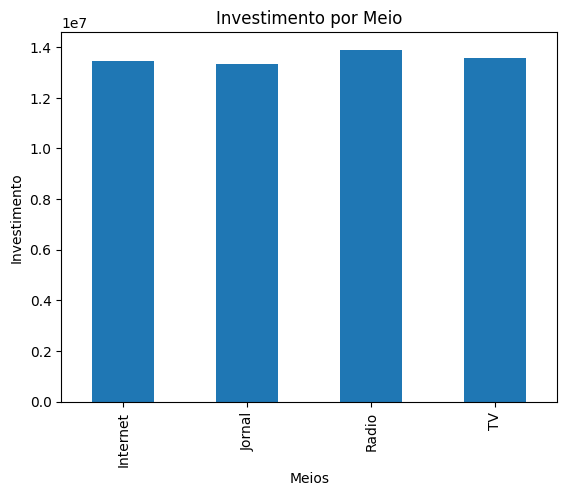

In [5]:
# Usando o Matplotlib

# Gráfico de barras mostrando a alocação de recursos em diferentes canais de publicidade

# Agrupando os dados por Meios e calculando o total de Investimento em cada Meio
investimento_por_meio = df.groupby('Meios')['Investimento'].sum()

# Criando um gráfico de barras com os valores de investimento por Meio
investimento_por_meio.plot(kind='bar')

# Título ao gráfico e aos eixos
plt.title('Investimento por Meio')
plt.xlabel('Meios')
plt.ylabel('Investimento')

# Exibindo o gráfico
plt.show()

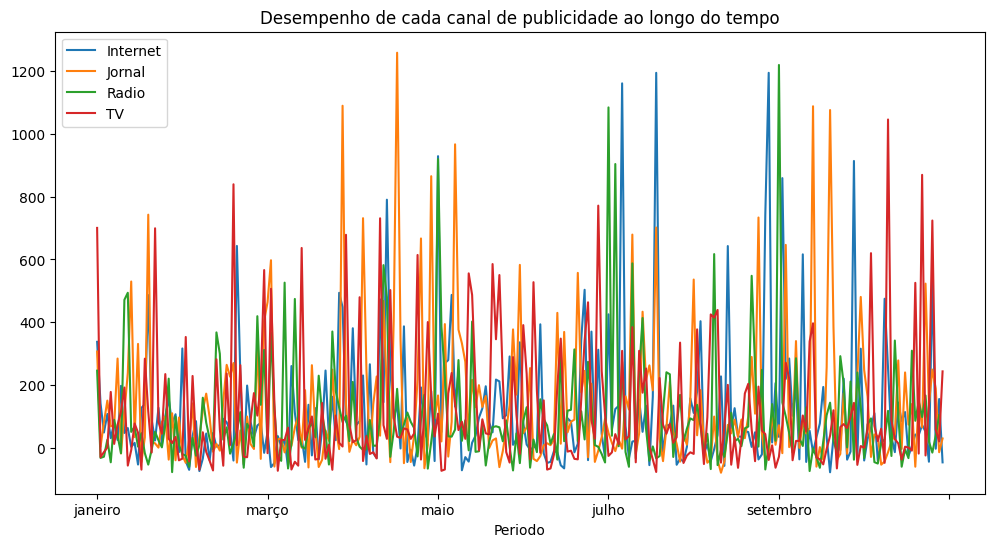

In [6]:
# Gráfico de linha mostrando o desempenho de cada canal de publicidade ao longo do tempo

# Removendo o símbolo "%" da coluna "ROI %" e converte-a para um tipo numérico
df['ROI %'] = df['ROI %'].str.replace('%', '').astype(float)

# Agrupando o DataFrame por canal de publicidade
grouped = df.groupby('Meios')

# Criando um gráfico de linhas
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando um gráfico de linha para cada grupo
for name, group in grouped:
    group.plot(x='Periodo', y='ROI %', ax=ax, label=name)

# Título e legenda ao gráfico
ax.set_title('Desempenho de cada canal de publicidade ao longo do tempo')
ax.legend()

# Exibindo o gráfico
plt.show()

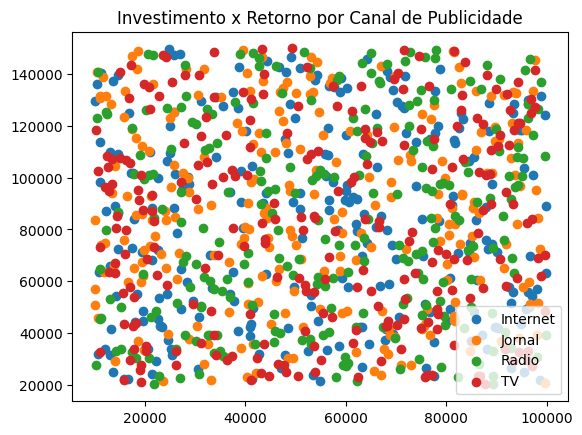

In [7]:
# Gráfico de dispersão mostrando a relação entre investimento e retorno em cada canal de publicidade

# Agrupando os dados por canal de publicidade
grupo_por_meios = df.groupby('Meios')

# Criando um gráfico de dispersão para cada canal de publicidade
for meio, grupo in grupo_por_meios:
    plt.scatter(grupo['Investimento'], grupo['Retorno'], label=meio)

# Título e legenda ao gráfico 
plt.title('Investimento x Retorno por Canal de Publicidade')
plt.legend()

# Exibindo o gráfico
plt.show()

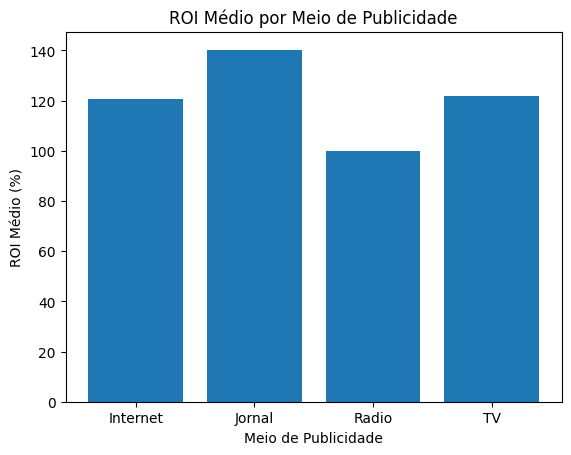

In [8]:
# Agrupando os dados por meio de publicidade e calcule o ROI médio para cada meio
roi_por_meio = df.groupby('Meios')['ROI %'].mean()

# Criando um gráfico de barras mostrando o ROI médio para cada meio
plt.bar(roi_por_meio.index, roi_por_meio.values)
plt.title('ROI Médio por Meio de Publicidade')
plt.xlabel('Meio de Publicidade')
plt.ylabel('ROI Médio (%)')
plt.show()

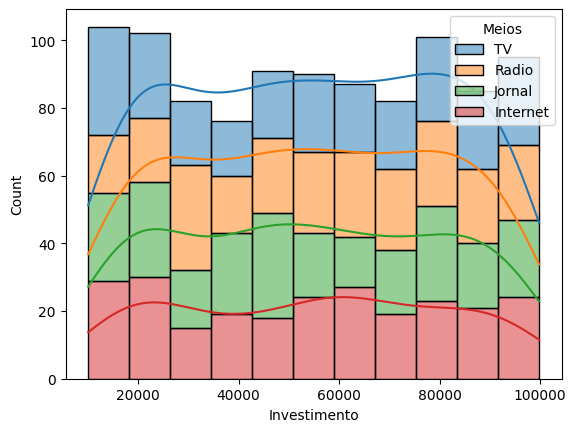

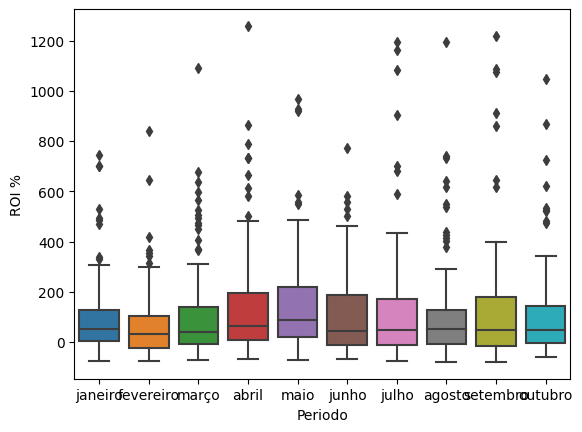

In [9]:
# Usando o Seaborn

# Histograma do investimento em cada meio de publicidade
sns.histplot(data=df, x="Investimento", hue="Meios", multiple="stack", kde=True)
plt.show()

# Boxplot do ROI em cada mês
sns.boxplot(data=df, x="Periodo", y="ROI %")
plt.show()

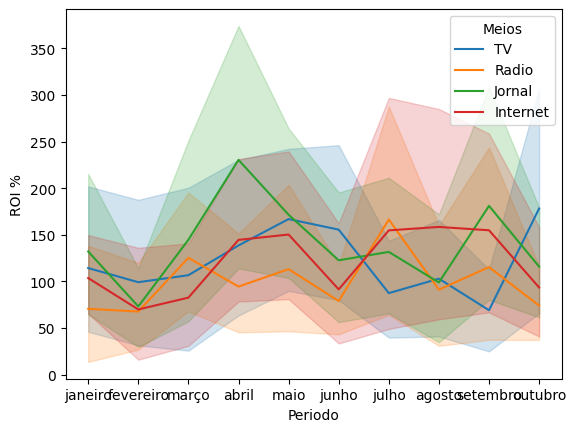

In [10]:
# Gráfico de linha do ROI em cada meio de publicidade
sns.lineplot(data=df, x="Periodo", y="ROI %", hue="Meios")
plt.show()

In [11]:
# Importando o pandas_profiling
import pandas_profiling

# Criando um profile passando o df como parâmetro 
profile = pandas_profiling.ProfileReport(df)

# Exibindo o profile
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Importando dependencias para o dashboard

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

<ipython-input-12-a0a2078fb474>:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-12-a0a2078fb474>:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [13]:
# Cria uma instância da aplicação Dash com o nome "__name__"
app = dash.Dash(__name__)

# Define o layout da aplicação
app.layout = html.Div(children=[
    # Título da página
    html.H1(children='Dashboard Interativo'),

    # Descrição do dashboard
    html.Div(children='''
        Exibindo dados de investimentos em publicidade
    '''),

    # Gráfico de barras exibindo o retorno sobre o investimento
    dcc.Graph(
        id='grafico-roi',
        figure={
            'data': [
                {'x': df['Periodo'], 'y': df['ROI %'], 'type': 'bar', 'name': 'ROI %'},
            ],
            'layout': {
                'title': 'Retorno sobre o Investimento (ROI)'
            }
        },
    ),
])


In [14]:
# Define a função de callback
@app.callback(
    # Define a saída da função (o gráfico de ROI)
    Output('grafico-roi', 'figure'),
    # Define a entrada da função (o valor selecionado no dropdown de período)
    [Input('periodo-dropdown', 'value')])
def atualiza_grafico(periodo):
    # Filtra o DataFrame df de acordo com o período selecionado
    filtro = df[df['Periodo'] == periodo]
    
    # Retorna um objeto com dados e layout atualizados de acordo com o período selecionado
    return {
        'data': [
            {'x': filtro['Meios'], 'y': filtro['ROI %'], 'type': 'bar', 'name': 'ROI %'},
        ],
        'layout': {
            'title': 'Retorno sobre o Investimento (ROI) - {}'.format(periodo)
        }
    }


In [16]:
# Verifica se o arquivo está sendo executado diretamente como um script
if __name__ == '__main__':
    # Inicia a execução do servidor Dash
    # OBS: Aparentemente não roda no Colab
    app.run_server()

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8050
INFO:werkzeug:Press CTRL+C to quit
